In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [2]:
import os
import glob

# 이미지가 저장된 로컬 기기의 경로로 이 부분을 조정하세요
path = "/mnt/c/Users/hajun/Project/image/original"

# glob을 사용하여 모든 이미지 파일 경로 가져오기
IU = glob.glob(os.path.join(path, "IU/*"))
Seulgi = glob.glob(os.path.join(path, "Seulgi/*"))
Son = glob.glob(os.path.join(path, "Son/*"))

def rename(files):
    if 'IU' in files[0]:
        for i, f in enumerate(files):
            os.rename(f, os.path.join(path, "IU", f'IU_{i:03d}.jpg'))
        print(f"IU {i+1}번째 이미지까지 성공")

    elif 'Seulgi' in files[0]:
        for i, f in enumerate(files):
            os.rename(f, os.path.join(path, "Seulgi", f'Seulgi_{i:03d}.jpg'))
        print(f"Seulgi {i+1}번째 이미지까지 성공")

    elif 'Son' in files[0]:
        for i, f in enumerate(files):
            os.rename(f, os.path.join(path, "Son", f'Son_{i:03d}.jpg'))
        print(f"Son {i+1}번째 이미지까지 성공")



In [3]:
rename(IU)
rename(Seulgi)
rename(Son)

IU 100번째 이미지까지 성공
Seulgi 100번째 이미지까지 성공
Son 100번째 이미지까지 성공


In [4]:
IU = sorted(glob.glob(path+"/IU" + '/*'))
Seulgi = sorted(glob.glob(path+"/Seulgi"+'/*'))
Son = sorted(glob.glob(path+"/Son"+'/*'))

print('IU 이미지 개수: {}\nSeulgi 이미지 개수: {}\nSon 이미지 개수: {}'.format(len(IU), len(Seulgi), len(Son)))

IU 이미지 개수: 100
Seulgi 이미지 개수: 100
Son 이미지 개수: 100


In [5]:
whole_sum = len(IU)+len(Seulgi)+len(Son)

print('전체 이미지 개수 : {}\n\nIU 이미지 비율 : {:.2f}%\nSeulgi 이미지 비율 : {:.2f}%\nSon 이미지 비율 : {:.2f}%\n%'.format( whole_sum, 100*len(IU)/whole_sum, 100*len(Seulgi)/whole_sum, 100*len(Son)/whole_sum ))
     

전체 이미지 개수 : 300

IU 이미지 비율 : 33.33%
Seulgi 이미지 비율 : 33.33%
IU 이미지 비율 : 33.33%
%


In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import cv2
%matplotlib inline

In [8]:
# cv2를 이용해 이미지를 읽는 함수 정의
def read_img(file_path):
    img_arr = cv2.imread(file_path)
    return cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB) # cvtColor로 BGR을 RGB로 바꿔줌

In [9]:
# 각 이미지 폴더에서 3개씩 랜덤으로 이미지 시각화 하기

# 이미지 array 준비
import random
img_arrs = []
img_num = range(0,200)

for i in random.sample(img_num, 4):
    
    img_arrs.append(read_img(IU[i]))
    img_arrs.append(read_img(Seulgi[i]))
    img_arrs.append(read_img(Son[i]))

In [10]:
print("총 {}개의 이미지 ".format(len(img_arrs)))

총 12개의 이미지 


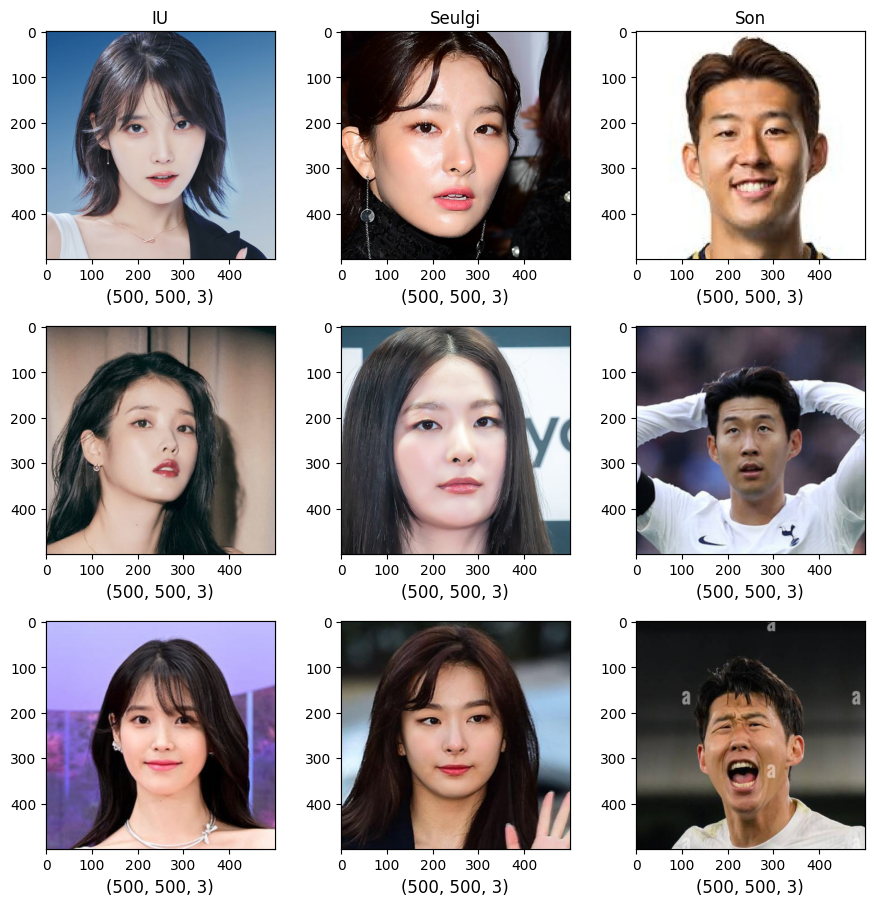

In [11]:
rows = 3 # 3개씩 샘플링 했으므로
columns = 3

# 그림판 설정
fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*3, rows*3))

# 각 판에 이미지 출력
for num in range(1, rows*columns+1): # 1번 부터 15번 까지
    
    fig.add_subplot(rows, columns, num) # 원하는 위치 번호(num)를 입력
    idx = num - 1 # 인덱스
    
    plt.imshow(img_arrs[idx], aspect='auto')
    plt.xlabel(f'{img_arrs[idx].shape}', fontsize=12)

fig.tight_layout() # 이미지 사이 간격 조정



# 제목 설정
cols = ['IU', 'Seulgi', 'Son']

for folder_idx, ax in enumerate(axes[0]):
    ax.set_title(cols[folder_idx])

# xtick, ytick 제거
for idx, ax in enumerate(axes.flat):
    ax.set_xticks([])
    ax.set_yticks([])

In [12]:
path = "/mnt/c/Users/hajun/Project/image/original"
IU = sorted(glob.glob(path+"/IU" + '/*'))
Seulgi = sorted(glob.glob(path+"/Seulgi"+'/*'))
Son = sorted(glob.glob(path+"/Son"+'/*'))

print('IU 이미지 개수: {}\nSeulgi 이미지 개수: {}\nSon 이미지 개수: {}'.format(len(IU), len(Seulgi), len(Son)))

IU 이미지 개수: 100
Seulgi 이미지 개수: 100
Son 이미지 개수: 100


In [13]:
# 비율이 작은 test로 빠르게 split

import math

IU_test_count = round(len(IU)*0.2)
Seulgi_test_count = round(len(Seulgi)*0.2)
Son_test_count = round(len(Son)*0.2)

print('IU test파일에 들어갈 이미지 개수 : {}/{}'.format(IU_test_count,len(IU)))
print('Seulgi test파일에 들어갈 이미지 개수 : {}/{}'.format(Seulgi_test_count,len(Seulgi)))
print('Son test파일에 들어갈 이미지 개수 : {}/{}'.format(Son_test_count,len(Son)))

IU test파일에 들어갈 이미지 개수 : 20/100
Seulgi test파일에 들어갈 이미지 개수 : 20/100
Son test파일에 들어갈 이미지 개수 : 20/100


In [14]:
import shutil
def split( img_list, test_count, train_path, test_path):
  
  test_files=[]
  for i in random.sample( img_list, test_count ):
    test_files.append(i)

  # 차집합으로 train/test 리스트 생성하기
  train_files = [x for x in img_list if x not in test_files]

  for k in train_files:
    shutil.copy(k, train_path)
  
  for c in test_files:
    shutil.copy(c, test_path)

  print('train 폴더 이미지 개수 : {}\ntest 폴더 이미지 개수 : {}'.format(len(glob.glob(train_path+'/*')),len(glob.glob(test_path+'/*'))))
     

In [15]:

# 돌고래 파일
IU_train_path='/mnt/c/Users/hajun/Project/image/train/IU'
IU_test_path='/mnt/c/Users/hajun/Project/image/test/IU'

Seulgi_train_path='/mnt/c/Users/hajun/Project/image/train/Seulgi'
Seulgi_test_path='/mnt/c/Users/hajun/Project/image/test/Seulgi'

Son_train_path='/mnt/c/Users/hajun/Project/image/train/Son'
Son_test_path='/mnt/c/Users/hajun/Project/image/test/Son'

split(IU, IU_test_count, IU_train_path, IU_test_path)
split(Seulgi, Seulgi_test_count, Seulgi_train_path, Seulgi_test_path)
split(Son, Son_test_count, Son_train_path, Son_test_path)

train 폴더 이미지 개수 : 80
test 폴더 이미지 개수 : 20
train 폴더 이미지 개수 : 80
test 폴더 이미지 개수 : 20
train 폴더 이미지 개수 : 80
test 폴더 이미지 개수 : 20


In [16]:
# 원본 이미지 넘버링하기 -> rename 함수를 만들어줬으므로 경로만 바꿔서 재사용

# trainset 넘버링

path = "/mnt/c/Users/hajun/Project/image/train"
IU = glob.glob(path+"/IU" + '/*')
Seulgi = glob.glob(path+"/Seulgi"+'/*')
Son = glob.glob(path+"/Son"+'/*')

rename(IU)
rename(Seulgi)
rename(Son)

IU 80번째 이미지까지 성공
Seulgi 80번째 이미지까지 성공
Son 80번째 이미지까지 성공


In [17]:
path = "/mnt/c/Users/hajun/Project/image/train"
IU = glob.glob(path+"/IU" + '/*')
Seulgi = glob.glob(path+"/Seulgi"+'/*')
Son = glob.glob(path+"/Son"+'/*')

print('각각 마지막 파일 이름 : ',os.path.basename(sorted(IU)[-1]), os.path.basename(sorted(Seulgi)[-1]), os.path.basename(sorted(Son)[-1]))
     

각각 마지막 파일 이름 :  IU_079.jpg Seulgi_079.jpg Son_079.jpg


In [18]:
# testset 넘버링

path = "/mnt/c/Users/hajun/Project/image/test"
IU = glob.glob(path+"/IU" + '/*')
Seulgi = glob.glob(path+"/Seulgi"+'/*')
Son = glob.glob(path+"/Son"+'/*')

rename(IU)
rename(Seulgi)
rename(Son)

IU 20번째 이미지까지 성공
Seulgi 20번째 이미지까지 성공
Son 20번째 이미지까지 성공


In [19]:
path = "/mnt/c/Users/hajun/Project/image/test"
IU = glob.glob(path+"/IU" + '/*')
Seulgi = glob.glob(path+"/Seulgi"+'/*')
Son = glob.glob(path+"/Son"+'/*')

print('각각 마지막 파일 이름 : ',os.path.basename(sorted(IU)[-1]), os.path.basename(sorted(Seulgi)[-1]), os.path.basename(sorted(Son)[-1]))
     

각각 마지막 파일 이름 :  IU_019.jpg Seulgi_019.jpg Son_019.jpg
